# 蒙特卡洛计算积分 （几个简单例子）
一维积分
$$S = \int_1^2 ln x dx $$

In [2]:
using Plots

In [31]:
function aimFunc(x)
    #sqrt(x)-x
    log(x)
end

aimFunc (generic function with 1 method)

In [34]:
x = 1:0.001:2
y = map(aimFunc,x);

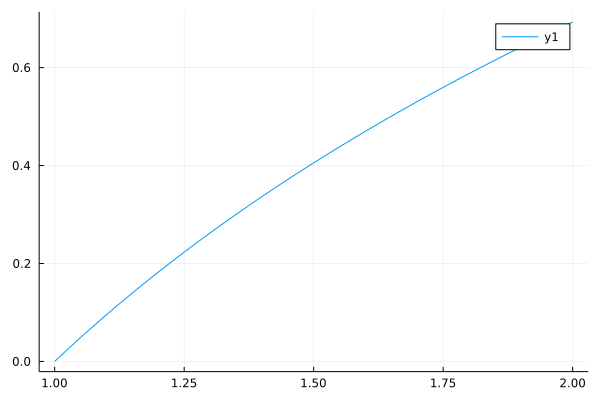

In [35]:
plot(x,y)

##  面积法

In [69]:
N = Int64(1e7)
success = 0

for i = 1:N
    xRand = rand()+1
    yRand = rand()
    global success += yRand < aimFunc(xRand) ? 1 : 0
end
    

In [70]:
success/N

0.3861446

## 平均值法

In [41]:
N = Int64(1e6)
valueSum = 0.0
for i = 1:N
    xRand = rand()+1
    valueSum += aimFunc(xRand)
end

In [42]:
valueSum/N

0.38617160788755833

三重积分
$$ S = \int_0^1 \int_0^1 \int_0^1 x^3 y^5 z^6 dx dy dz= \frac{1}{168}$$

In [64]:
function aimFunc2(x,y,z)
    x^3 * y^5*z^6
end

aimFunc2 (generic function with 2 methods)

In [65]:
N = Int64(1e8)
valueSum = 0.0
for i = 1:N
    xRand,yRand,zRand = rand(3)
    valueSum += aimFunc2(xRand,yRand,zRand)
end

In [66]:
valueSum/N

0.005946181948430685

In [68]:
1/168

0.005952380952380952

# 含有奇点的积分
$$ S = \int_0^1 \frac{1}{\sqrt{x}}dx = 2$$

In [1]:
function aimFunc3(x)
    1/sqrt(x)
end

aimFunc3 (generic function with 1 method)

In [2]:
Split_num = 50
N = Int(1e6)
Intgral_value = zeros(Split_num)
for Split_index = 1:Split_num
    Intgral_min = exp(-Split_index)
    Intgral_range = exp(-Split_index+1) - exp(-Split_index)
    for i = 1:N
        xRand = Intgral_range*rand()+Intgral_min
        Intgral_value[Split_index] += aimFunc3(xRand)
    end
    Intgral_value[Split_index]*= Intgral_range/N
end

In [3]:
sum(Intgral_value)

2.0001835708690696